In [2]:
# Loading important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Loading the training data

In [9]:
df = pd.read_csv('datatrainingcopy.csv')
df.head(20)

,Number,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2/4/15 17:51,23.180,27.272000,426.0,721.250000,0.004793,1
1,2,2/4/15 17:51,23.150,27.267500,429.5,714.000000,0.004783,1
2,3,2/4/15 17:53,23.150,27.245000,426.0,713.500000,0.004779,1
3,4,2/4/15 17:54,23.150,27.200000,426.0,708.250000,0.004772,1
4,5,2/4/15 17:55,23.100,27.200000,426.0,704.500000,0.004757,1
5,6,2/4/15 17:55,23.100,27.200000,419.0,701.000000,0.004757,1
6,7,2/4/15 17:57,23.100,27.200000,419.0,701.666667,0.004757,1
7,8,2/4/15 17:57,23.100,27.200000,419.0,699.000000,0.004757,1
8,9,2/4/15 17:58,23.100,27.200000,419.0,689.333333,0.004757,1
9,10,2/4/15 18:00,23.075,27.175000,419.0,688.000000,0.004745,1


In [7]:
#correlation plot
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

NameError: name 'sns' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
df.info()

In [4]:
df.isnull().sum()

Number           0
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [5]:
df.describe()

,Number,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,4072.000000,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,2350.825954,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,1.000000,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,2036.500000,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,4072.000000,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,6107.500000,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,8143.000000,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


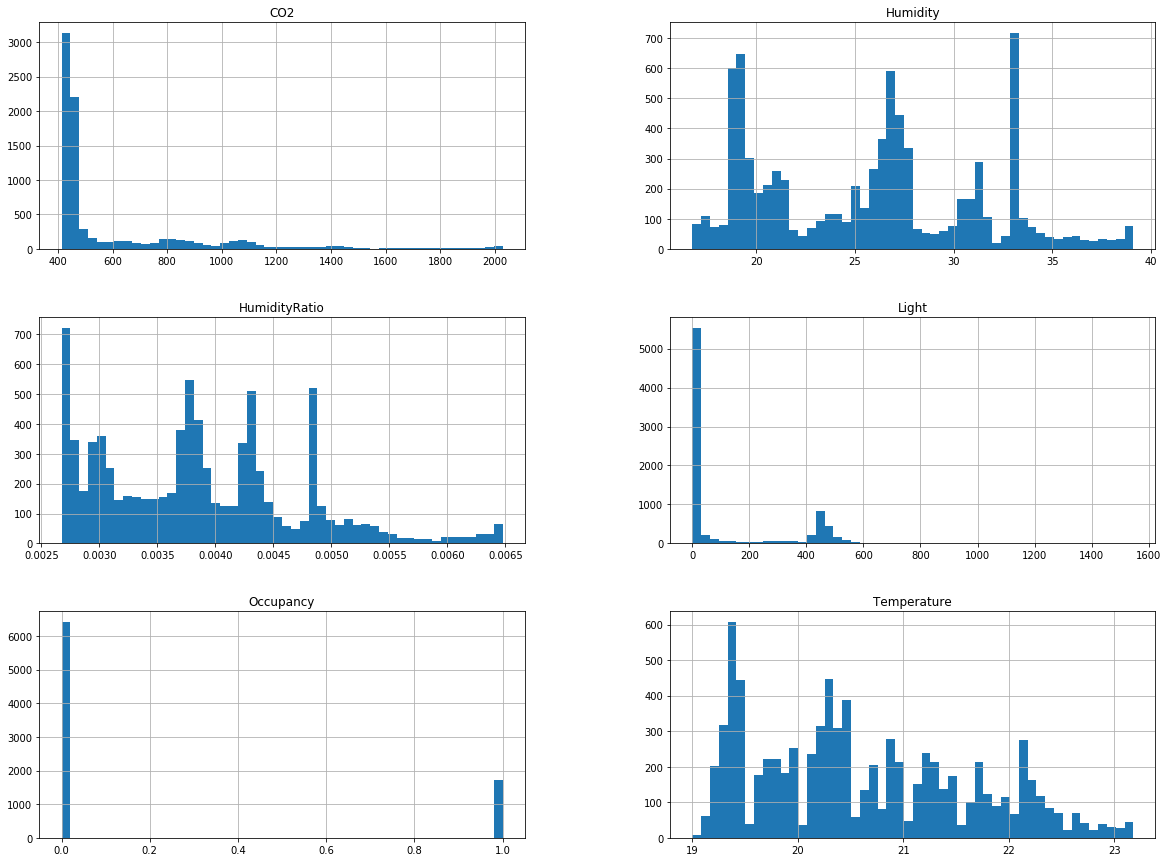

In [6]:
df1=df
df1 = df.drop(['Number', 'date'], axis=1)
df1.hist(bins=50, figsize=(20,15))
plt.show()

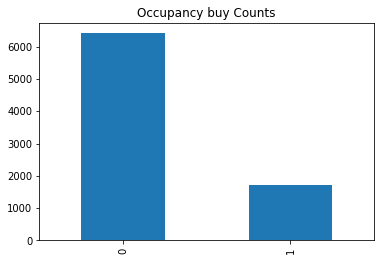

In [7]:
df['Occupancy'].value_counts().plot(kind='bar', 
                                   title='Occupancy buy Counts')
plt.show()

In [13]:
df['Occupancy'].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

In [ ]:

#import matplotlib as mpl

labels = ['Occupied', 'Not Occupied']
y = [51178,7208]
explode = (0, 0.1)
fig, ax1 = plt.subplots()
ax1.pie(y, labels=labels,  autopct='%1.1f%%', explode=explode, startangle=90, colors=['lightblue', 'crimson'], textprops={'fontsize': 14}, 
        wedgeprops={"edgecolor":"0"})
ax1.set_title("Good and bad purchases")
mpl.rcParams['font.size'] = 10.0

fig.tight_layout()
fig.show()

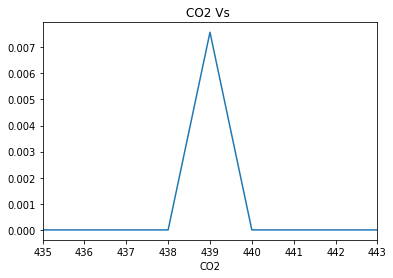

In [18]:
#Grafico che fa vedere come più è alto VehicleAge più è alta la percentuale di isBadBuy
df.groupby('CO2').agg([np.mean,np.size])['Occupancy'].query('size > 100')['mean'].plot(title = "CO2 Vs ")
plt.show()

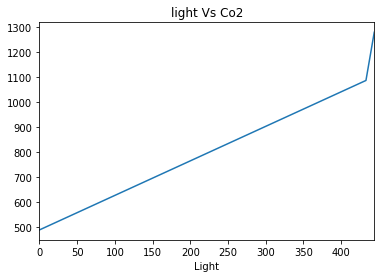

In [24]:
df.groupby('Light').agg([np.mean,np.size])['CO2'].query('size > 100')['mean'].plot(title = "light Vs Co2")
plt.show()

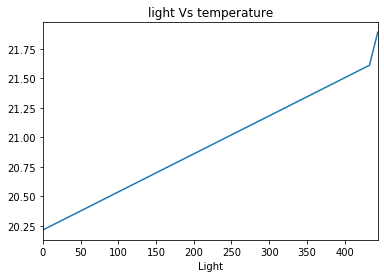

In [23]:
df.groupby('Light').agg([np.mean,np.size])['Temperature'].query('size > 100')['mean'].plot(title = "light Vs temperature")
plt.show()

# Loading the two test datasets

In [4]:
df_test1 = pd.read_csv('datatestcopy.csv')
df_test1.head()

,Number,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,140,02/02/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,141,02/02/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,142,02/02/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,143,02/02/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,144,02/02/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


In [9]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 8 columns):
Number           2665 non-null int64
date             2665 non-null object
Temperature      2665 non-null float64
Humidity         2665 non-null float64
Light            2665 non-null float64
CO2              2665 non-null float64
HumidityRatio    2665 non-null float64
Occupancy        2665 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 166.7+ KB


In [5]:
df_test2 = pd.read_csv('datatest2copy.csv')
df_test2.head()

,Number,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2/11/15 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2,2/11/15 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,3,2/11/15 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,4,2/11/15 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,5,2/11/15 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [10]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 8 columns):
Number           9752 non-null int64
date             9752 non-null object
Temperature      9752 non-null float64
Humidity         9752 non-null float64
Light            9752 non-null float64
CO2              9752 non-null float64
HumidityRatio    9752 non-null float64
Occupancy        9752 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 609.6+ KB


## Dividing the training data

In [7]:
class_name = "Occupancy"

In [10]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# preparing test data for model

In [11]:
class_name = "Occupancy"

attributes = [col for col in df.columns if col != class_name]
X_test1 = df_test1[attributes].values
y_test1 = df_test1[class_name]

In [12]:
class_name = "Occupancy"

attributes = [col for col in df.columns if col != class_name]
X_test2 = df_test2[attributes].values
y_test2 = df_test2[class_name]

# copy the above cells in every sheet

##### Data Partitioning

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# k Nearest Neighbor n = 5

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
y_pred = clf.predict(X_test)

In [17]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## Doing prediction on testset data

In [18]:
y_pred_t1 = clf.predict(X_test1)

In [19]:
y_pred_t2 = clf.predict(X_test2)

# Trainingset results

In [ ]:
report(y_test1, y_pred_t1)

In [20]:
def report(y_test, y_pred):
    
    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    print('F1-score %s' % f1_score(y_test, y_pred, average=None))
    print(classification_report(y_test, y_pred))
    
    p

Accuracy 0.9926320098239869
F1-score [0.99531981 0.98269231]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Testset 1 results

In [21]:
print('Accuracy %s' % accuracy_score(y_test1, y_pred_t1))
print('F1-score %s' % f1_score(y_test1, y_pred_t1, average=None))
print(classification_report(y_test1, y_pred_t1))

Accuracy 0.950844277673546
F1-score [0.96172948 0.93130572]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



# Testset 2 results

In [22]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred_t2))
print('F1-score %s' % f1_score(y_test2, y_pred_t2, average=None))
print(classification_report(y_test2, y_pred_t2))

Accuracy 0.9854388843314192
F1-score [0.99075039 0.96579961]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



# k Nearest Neighbor n = 3

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [25]:
y_pred = clf.predict(X_test)

In [26]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## Doing prediction on testset data

In [27]:
y_pred_t1 = clf.predict(X_test1)

In [28]:
y_pred_t2 = clf.predict(X_test2)

# Trainingset results

In [29]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9934506753990995
F1-score [0.99584416 0.98455598]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Roc curve for trainingset

In [30]:
import scikitplot as skplt
import matplotlib.pyplot as plt


# k Nearest Neighbor n = 5

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
y_pred = clf.predict(X_test)

In [34]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## Doing prediction on testset data

In [35]:
y_pred_t1 = clf.predict(X_test1)

In [36]:
y_pred_t2 = clf.predict(X_test2)

# Trainingset results

In [37]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9926320098239869
F1-score [0.99531981 0.98269231]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Testset 1 results

In [38]:
print('Accuracy %s' % accuracy_score(y_test1, y_pred_t1))
print('F1-score %s' % f1_score(y_test1, y_pred_t1, average=None))
print(classification_report(y_test1, y_pred_t1))

Accuracy 0.950844277673546
F1-score [0.96172948 0.93130572]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



# Testset 2 results

In [39]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred_t2))
print('F1-score %s' % f1_score(y_test2, y_pred_t2, average=None))
print(classification_report(y_test2, y_pred_t2))

Accuracy 0.9854388843314192
F1-score [0.99075039 0.96579961]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



# k Nearest Neighbor n = 5

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
y_pred = clf.predict(X_test)

In [43]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## Doing prediction on testset data

In [44]:
y_pred_t1 = clf.predict(X_test1)

In [45]:
y_pred_t2 = clf.predict(X_test2)

# Trainingset results

In [46]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
y_score = clf.predict_proba(X_test)

Accuracy 0.9926320098239869
F1-score [0.99531981 0.98269231]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Testset 1 results

In [47]:
print('Accuracy %s' % accuracy_score(y_test1, y_pred_t1))
print('F1-score %s' % f1_score(y_test1, y_pred_t1, average=None))
print(classification_report(y_test1, y_pred_t1))

Accuracy 0.950844277673546
F1-score [0.96172948 0.93130572]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



# Testset 2 results

In [48]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred_t2))
print('F1-score %s' % f1_score(y_test2, y_pred_t2, average=None))
print(classification_report(y_test2, y_pred_t2))

Accuracy 0.9854388843314192
F1-score [0.99075039 0.96579961]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



# Scikit-plot


In [1]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

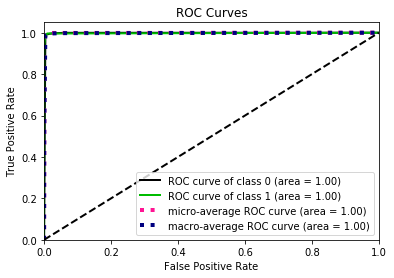

In [50]:
plot_roc(y_test, y_score)
plt.show()

In [ ]:
plot_lift_curve()

# Testset 1 results

In [51]:
print('Accuracy %s' % accuracy_score(y_test1, y_pred_t1))
print('F1-score %s' % f1_score(y_test1, y_pred_t1, average=None))
print(classification_report(y_test1, y_pred_t1))

Accuracy 0.950844277673546
F1-score [0.96172948 0.93130572]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



# Testset 2 results

In [52]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred_t2))
print('F1-score %s' % f1_score(y_test2, y_pred_t2, average=None))
print(classification_report(y_test2, y_pred_t2))

Accuracy 0.9854388843314192
F1-score [0.99075039 0.96579961]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



# Trying scaled data to see the results

In [53]:
df = pd.read_csv("procced_datatrainingcopy.csv")
class_name = "Occupancy"
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

FileNotFoundError: [Errno 2] File procced_datatrainingcopy.csv does not exist: 'procced_datatrainingcopy.csv'

In [ ]:
class_name = "Occupancy"

In [ ]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# k Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

# Testset results

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Trainingset 1 results

In [ ]:
df = pd.read_csv("scaled_datatestcopy.csv")

class_name = "Occupancy"
attributes = [col for col in df.columns if col != class_name]
X_test01 = df[attributes].values
y_test02 = df[class_name]



In [ ]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform') #test con k=1 e weight uniform
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance') #k = 3 and weight distance
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'n_neighbors': np.arange(1, 10 + 1), 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
search.fit(X_train, y_train)

In [ ]:
clf = search.best_estimator_

This is where you store the best model that you got by applying GridSearchCV

### An example from sklearn

In [ ]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

n_neighbors = 5

# import some data to play with
df = pd.read_csv('scaled_datatrainingcopy.csv')

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
class_name = "Occupancy"
#attributes = [col for col in df.columns if col != class_name]
attributes = ['Temperature', 'Light']
X = df[attributes].values
y = df[class_name]

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['black', 'white'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [ ]:
attributes = [col for col in df.columns if col != class_name]

In [ ]:
attributes